In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import warnings

In [36]:
warnings.filterwarnings("ignore", category=FutureWarning)

## Importing Dataset

In [37]:
data=pd.read_csv('day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [38]:
data.drop('instant',axis=1,inplace=True)

In [39]:
for i in data.columns[1:8]:
    print(i)
    print(data[i].value_counts())
    print('_'*25)

season
1    169
2    147
3     94
4     89
Name: season, dtype: int64
_________________________
yr
0    365
1    134
Name: yr, dtype: int64
_________________________
mnth
3     62
1     62
4     60
2     56
5     45
12    31
10    31
8     31
7     31
11    30
9     30
6     30
Name: mnth, dtype: int64
_________________________
holiday
0    485
1     14
Name: holiday, dtype: int64
_________________________
weekday
6    72
1    72
0    72
5    71
4    71
2    71
3    70
Name: weekday, dtype: int64
_________________________
workingday
1    341
0    158
Name: workingday, dtype: int64
_________________________
weathersit
1    312
2    170
3     17
Name: weathersit, dtype: int64
_________________________


In [40]:
data.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      499 non-null    object 
 1   season      499 non-null    int64  
 2   yr          499 non-null    int64  
 3   mnth        499 non-null    int64  
 4   holiday     499 non-null    int64  
 5   weekday     499 non-null    int64  
 6   workingday  499 non-null    int64  
 7   weathersit  499 non-null    int64  
 8   temp        499 non-null    float64
 9   atemp       499 non-null    float64
 10  hum         499 non-null    float64
 11  windspeed   499 non-null    float64
 12  casual      499 non-null    int64  
 13  registered  499 non-null    int64  
 14  cnt         499 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 58.6+ KB


#### No Null Values

In [42]:
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Graphs

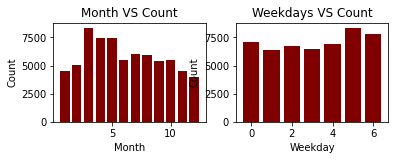

[]

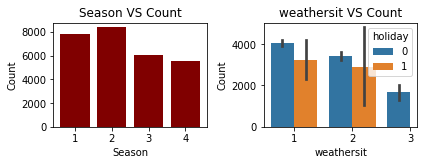

In [43]:

plt.subplot(2,2,1)
plt.bar(data.mnth,data.cnt, color ='maroon')
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Month VS Count")

plt.subplot(2,2,2)
plt.bar(data.weekday,data.cnt, color ='maroon')
plt.xlabel("Weekday")
plt.ylabel("Count")
plt.title("Weekdays VS Count")
plt.show()

plt.subplot(2,2,3)
plt.bar(data.season,data.cnt, color ='maroon')
plt.xlabel("Season")
plt.ylabel("Count")
plt.title("Season VS Count")

plt.subplot(2,2,4)
sns.barplot(data.weathersit,data.cnt,hue=data.holiday)
plt.xlabel("weathersit")
plt.ylabel("Count")
plt.title("weathersit VS Count")

plt.tight_layout()
plt.plot()

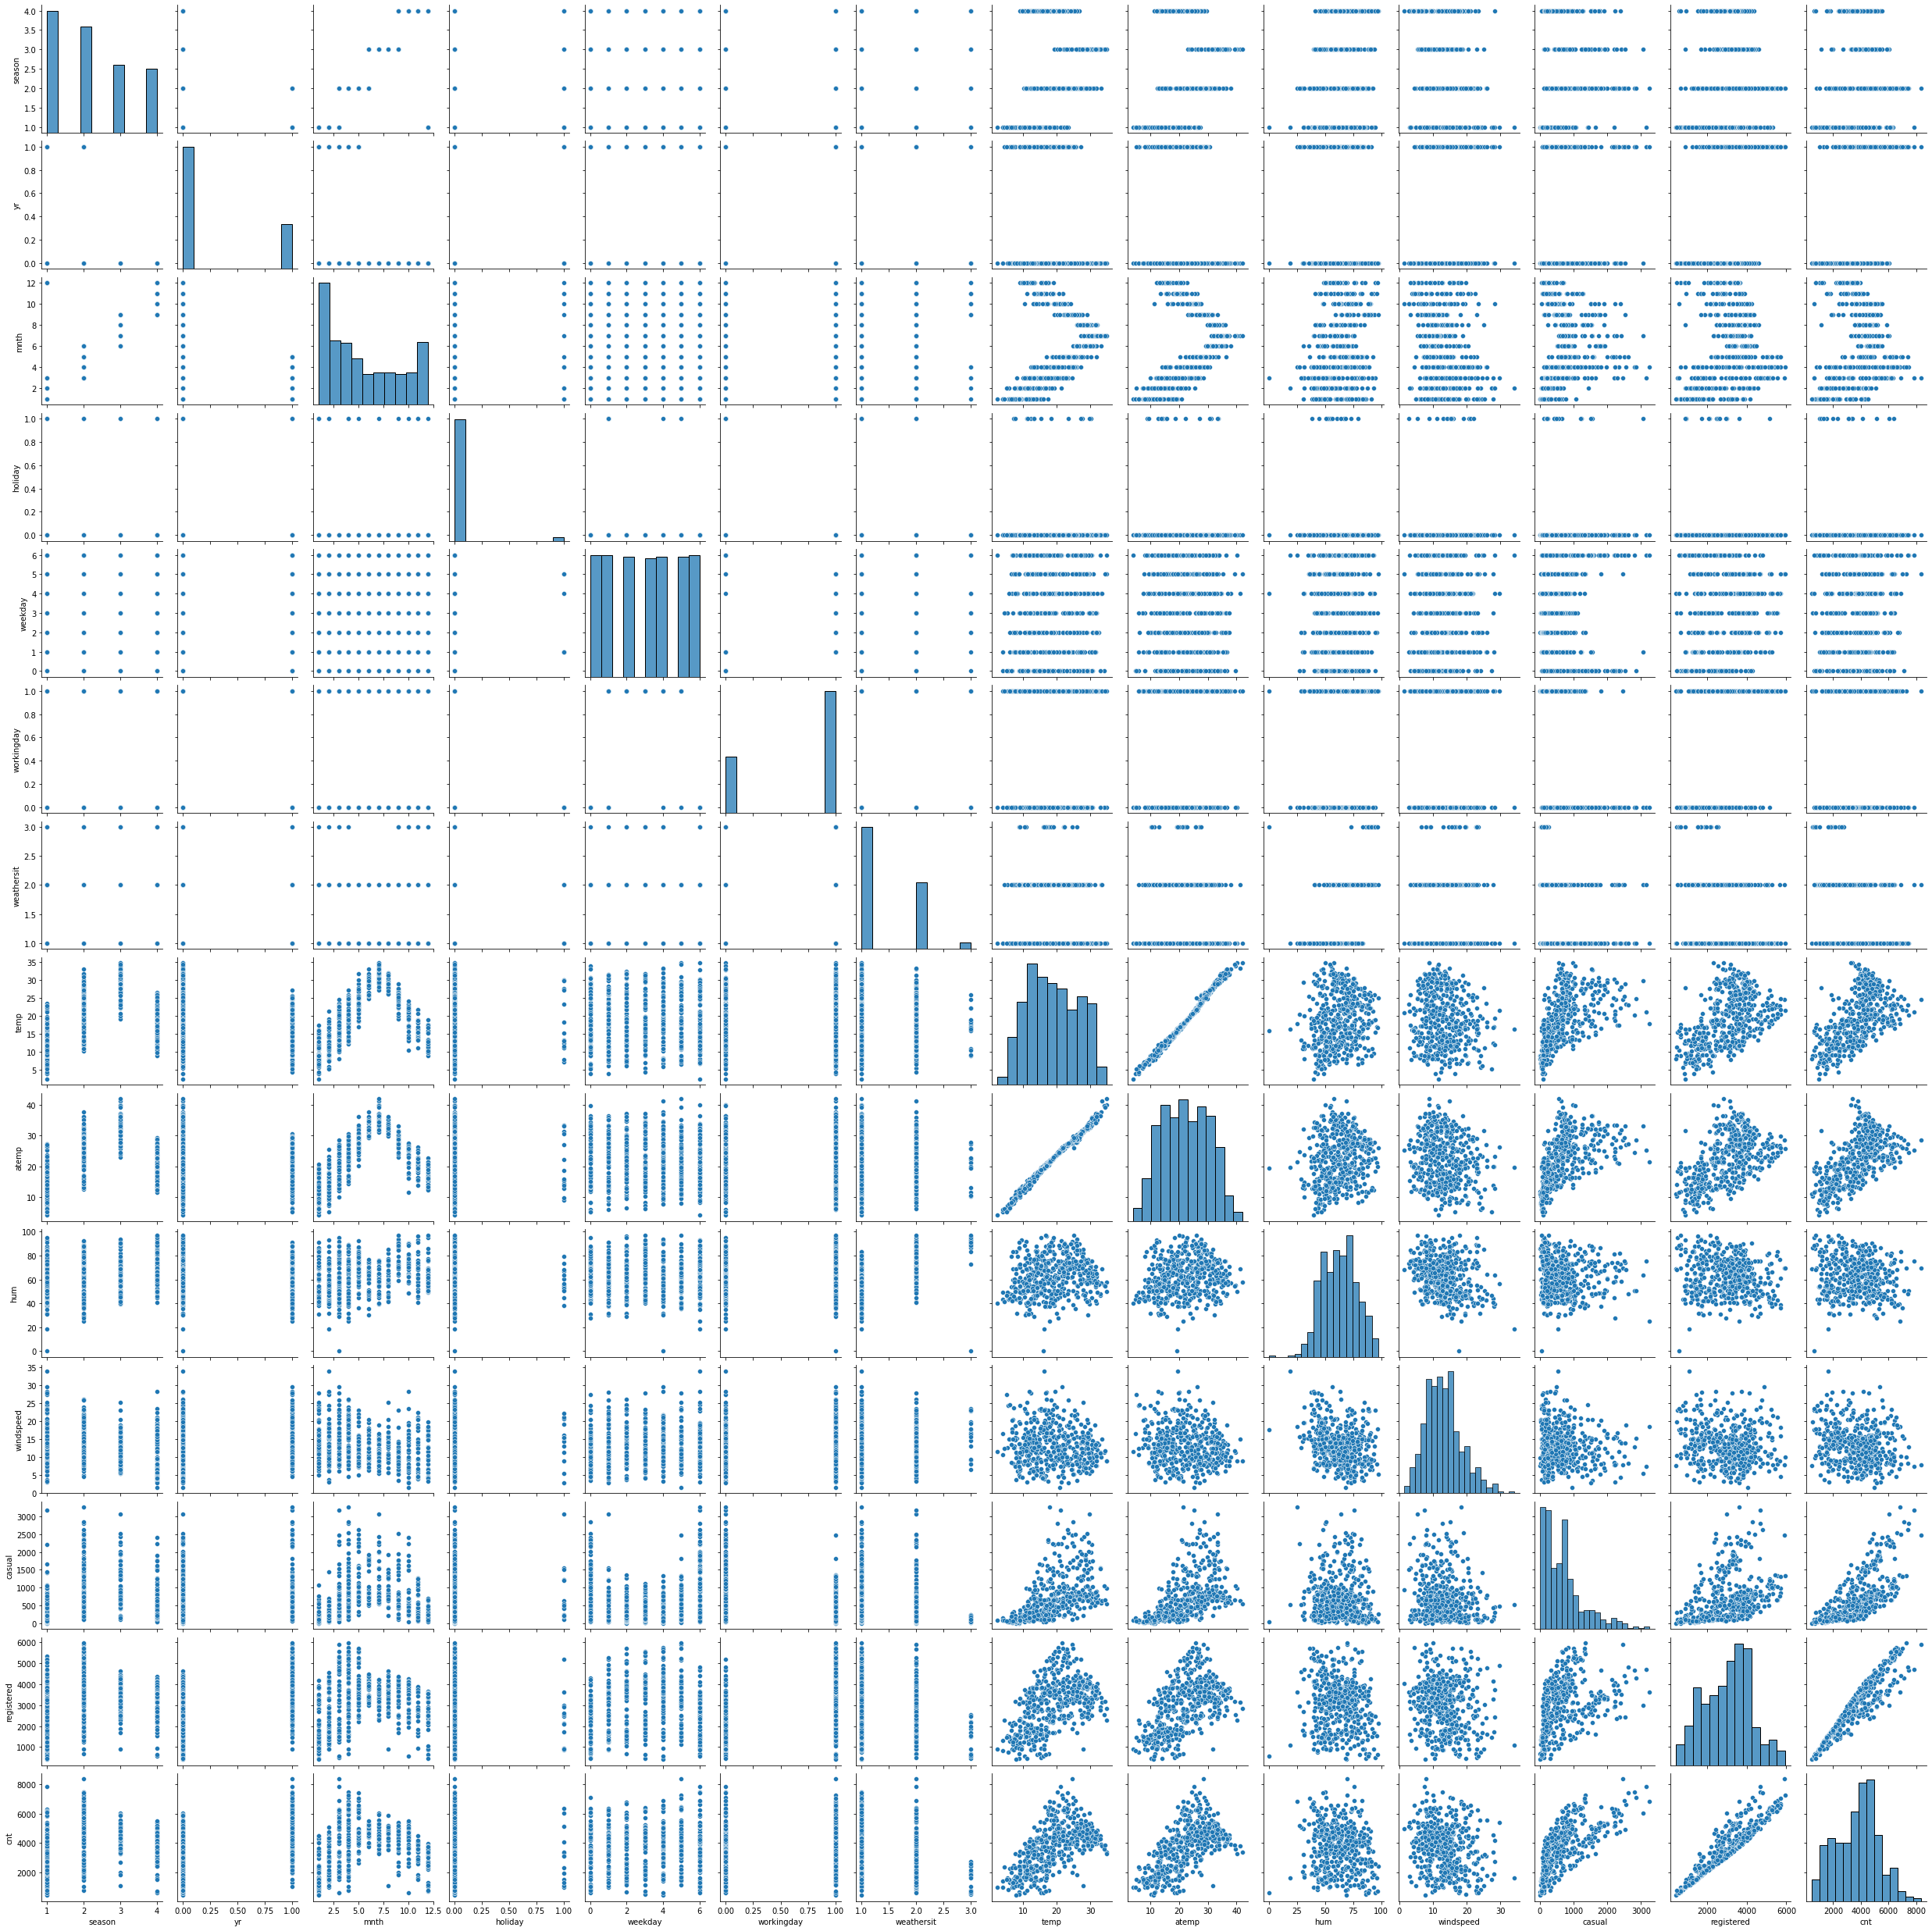

In [44]:
sns.pairplot(data)

## Dropping negative correlated features

<AxesSubplot:>

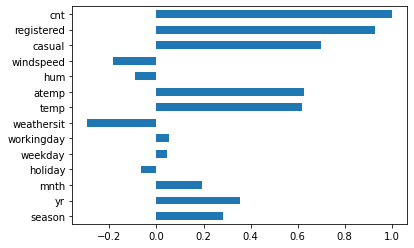

In [45]:
data.corr().iloc[:,-1].plot(kind='barh')

<AxesSubplot:>

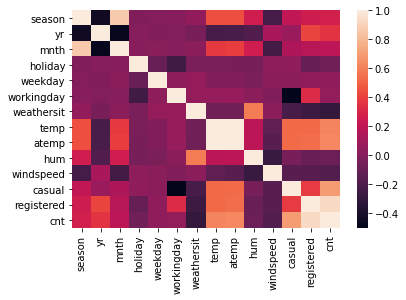

In [46]:
sns.heatmap(data.corr())

In [47]:
data.drop(['windspeed','hum','weathersit','dteday','workingday','holiday','weekday'],axis=1,inplace=True)

In [48]:
data.head()

,season,yr,mnth,temp,atemp,casual,registered,cnt
0,1,0,1,14.110847,18.18125,331,654,985
1,1,0,1,14.902598,17.68695,131,670,801
2,1,0,1,8.050924,9.47025,120,1229,1349
3,1,0,1,8.200000,10.60610,108,1454,1562
4,1,0,1,9.305237,11.46350,82,1518,1600


<AxesSubplot:>

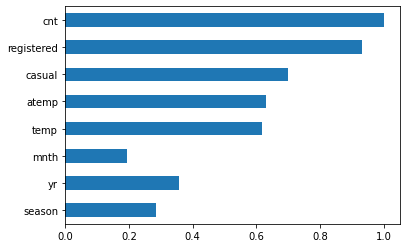

In [49]:
data.corr().iloc[:,-1].plot(kind='barh')

<AxesSubplot:>

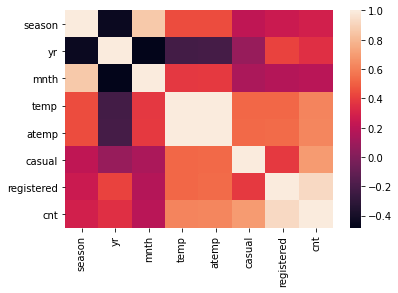

In [50]:
sns.heatmap(data.corr())

## PCA

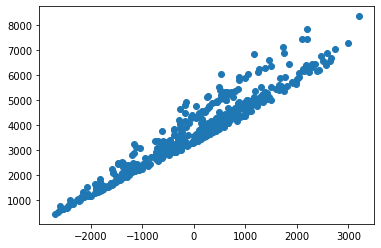

In [51]:
pc=PCA(n_components=1)
a=pc.fit_transform(data.iloc[:,:-1])
plt.scatter(a,data.iloc[:,-1])

## Model

In [52]:
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1], test_size=0.33, random_state=42)

In [53]:
model=LinearRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)

In [54]:
print('r2 score :',r2_score(y_test,pred))
print('Mean square error',mean_squared_error(y_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(y_test,pred)))

r2 score : 1.0
Mean square error 1.2234596579039525e-24
Root mean square error 1.1061011065467534e-12


### Saving Model as Pickle File

In [55]:
import pickle

with open('Model.pkl', 'wb') as f:
   pickle.dump(model, f)

# Making Predictions on Test Dataset

In [56]:
test=pd.read_csv('test.csv')

In [57]:
test.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,501,16-05-2019,2,1,5,0,3,1,1,26.103347,29.79875,69.7917,8.208304,991,6433
1,502,17-05-2019,2,1,5,0,4,1,1,24.326653,28.63065,52.0000,15.374825,1242,6142
2,503,18-05-2019,2,1,5,0,5,1,1,23.130847,27.55605,52.3333,9.166739,1521,6118
3,504,19-05-2019,2,1,5,0,6,0,1,24.600000,28.34540,45.6250,5.626325,3410,4884
4,505,20-05-2019,2,1,5,0,0,0,1,25.454153,29.19835,53.0417,17.042589,2704,4425


In [58]:
test.isnull().sum()   # No Null Values

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
dtype: int64

In [59]:
# Droping Unwanted Columns
test.drop(['instant','dteday','holiday','weekday','workingday','weathersit','hum','windspeed'],axis=1,inplace=True)

# Making Predictions
pred=model.predict(test)
pred=pd.Series(pred,name='Predicted_cnt')

In [60]:
df=pd.concat([test,pred],axis=1)
df

,season,yr,mnth,temp,atemp,casual,registered,Predicted_cnt
0,2,1,5,26.103347,29.79875,991,6433,7424.0
1,2,1,5,24.326653,28.63065,1242,6142,7384.0
2,2,1,5,23.130847,27.55605,1521,6118,7639.0
3,2,1,5,24.600000,28.34540,3410,4884,8294.0
4,2,1,5,25.454153,29.19835,2704,4425,7129.0
...,...,...,...,...,...,...,...,...
225,1,1,12,10.420847,11.33210,247,1867,2114.0
226,1,1,12,10.386653,12.75230,644,2451,3095.0
227,1,1,12,10.386653,12.12000,159,1182,1341.0
228,1,1,12,10.489153,11.58500,364,1432,1796.0
